In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt 
import seaborn as sns
from sqlalchemy import create_engine

# Extract from 2 CSV files 

In [3]:
df1=pd.read_csv('all_years_o3.csv')
df1.head()

,Date,Country,City,Specie,count,min (ppb),max (ppb),median (ppb)
0,2017-01-01,US,Los Angeles,o3,24,2.0,31.0,10.0
1,2017-01-01,CN,Shanghai,o3,188,1.0,39.0,11.0
2,2017-01-01,US,Manhattan,o3,24,3.0,28.0,16.0
3,2017-01-01,US,Jacksonville,o3,46,2.0,18.0,12.0
4,2017-01-01,CN,Beijing,o3,235,1.0,8.0,2.0


In [4]:
df2=pd.read_csv('all_years_pm25.csv')
df2.head()

,Date,Country,City,Specie,count,min (ug/m3),max (ug/m3),median (ug/m3)
0,2017-01-01,IN,New Delhi,pm25,24,54.9,282.7,177.7
1,2017-01-01,CN,Shanghai,pm25,215,12.0,63.2,34.4
2,2017-01-01,US,Jacksonville,pm25,115,3.1,113.6,8.1
3,2017-01-01,US,Los Angeles,pm25,69,3.3,109.7,15.9
4,2017-01-01,US,Manhattan,pm25,96,4.3,23.0,12.1


# Transform

In [6]:
df1.drop(df1.columns[[3,5,6,7]],axis=1,inplace=True)

In [7]:
df1.rename(columns={'count':'count_o3'},inplace=True)
df1.head()

,Date,Country,City,count_o3
0,2017-01-01,US,Los Angeles,24
1,2017-01-01,CN,Shanghai,188
2,2017-01-01,US,Manhattan,24
3,2017-01-01,US,Jacksonville,46
4,2017-01-01,CN,Beijing,235


In [8]:
df2.drop(df2.columns[[3,5,6,7]],axis=1,inplace=True)

In [9]:
df2.rename(columns={'count':'count_pm25'},inplace=True)
df2.head()

,Date,Country,City,count_pm25
0,2017-01-01,IN,New Delhi,24
1,2017-01-01,CN,Shanghai,215
2,2017-01-01,US,Jacksonville,115
3,2017-01-01,US,Los Angeles,69
4,2017-01-01,US,Manhattan,96


In [10]:
new_df=pd.merge(df1,df2,on=['Date','Country','City'],how='left')
new_df.head()

,Date,Country,City,count_o3,count_pm25
0,2017-01-01,US,Los Angeles,24,69
1,2017-01-01,CN,Shanghai,188,215
2,2017-01-01,US,Manhattan,24,96
3,2017-01-01,US,Jacksonville,46,115
4,2017-01-01,CN,Beijing,235,386


In [11]:
x=new_df.groupby('City')[['count_o3','count_pm25']].mean()

In [18]:
x

,count_o3,count_pm25
City,,
Beijing,421.474830,441.902041
Houston,111.990528,102.548038
Jacksonville,93.369064,133.354138
Los Angeles,22.764547,68.323410
Manhattan,24.729252,79.179592
Shanghai,500.526542,517.954089
Wuhan,373.917827,383.498607


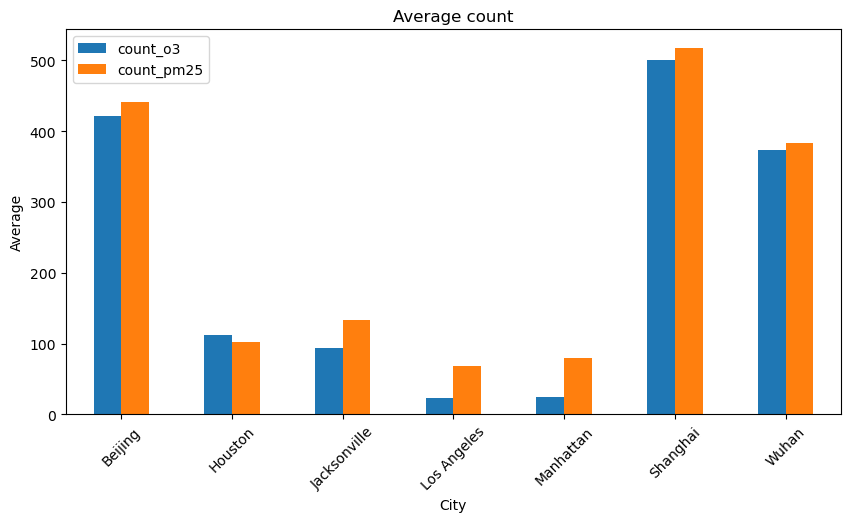

In [23]:
x.plot(kind='bar',figsize=(10,5))
plt.xlabel('City')
plt.ylabel('Average')
plt.title('Average count')
plt.xticks(rotation=45)
plt.legend(['count_o3','count_pm25'])
plt.show()

# Load

```sql
CREATE TABLE merge_counts(
Date DATE, Country VARCHAR(255),
City VARCHAR(255),
Count_o3 INT,
Count_pm25 INT
);
```


In [27]:
from config import username, password

In [31]:
protocol='mysql+pymysql'
url='localhost'
port=3306
db='etl_project'

connection_string=f"{protocol}://{username}:{password}@{url}:{port}/{db}"
engine=create_engine(connection_string)

In [39]:
inspector=

AttributeError: 'Engine' object has no attribute 'table_names'